In [132]:
# classification model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

In [133]:
import numpy as np

In [134]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


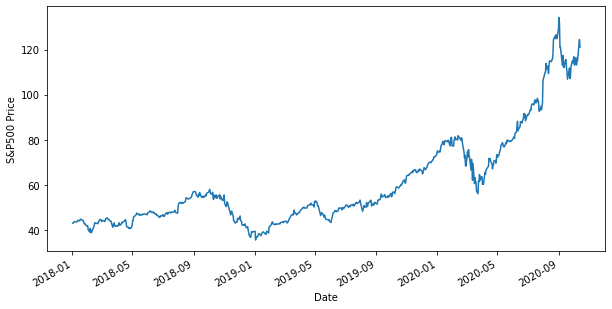

In [269]:
df = yf.download('AAPL', start="2018-01-01", end="2020-10-14")
df = df.dropna()
df.Close.plot(figsize=(10,5))
plt.ylabel("S&P500 Price")
plt.show()

In [270]:
df['D'] = df['Close'].shift(1)

In [271]:
df['D+1'] = df['Close']

In [246]:
y = np.where(df['D'] > df['D+1'], -1, 1)

In [247]:
df['y'] = y

In [261]:
X = df[['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume']]

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [263]:
cls = SVC().fit(X_train, y_train)

In [264]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

In [265]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 57.86%
Test Accuracy: 65.25%


In [266]:
df['Predicted_Signal'] = cls.predict(X)

In [267]:
pd.set_option('display.max_rows', None)

In [268]:
df

,Open,High,Low,Close,Adj Close,Volume,D,D+1,y,Predicted_Signal
Date,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600,NaN,43.064999,1,1
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600,43.064999,43.057499,-1,1
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400,43.057499,43.257500,1,1
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000,43.257500,43.750000,1,1
2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200,43.750000,43.587502,-1,1
2018-01-09,43.637501,43.764999,43.352501,43.582500,42.012432,86336000,43.587502,43.582500,-1,1
2018-01-10,43.290001,43.575001,43.250000,43.572498,42.002796,95839600,43.582500,43.572498,-1,1
2018-01-11,43.647499,43.872501,43.622501,43.820000,42.241379,74670800,43.572498,43.820000,1,1
2018-01-12,44.044998,44.340000,43.912498,44.272499,42.677582,101672400,43.820000,44.272499,1,1
